In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import string    #used to add subplot letters

First, we will read in the training dataset and get some basic descriptions on the the columns and the state of missing data

In [2]:
titanic = pd.read_csv("./data/train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

O'all we have 891 observations in the training data.

The columns with null values are Age, Cabin, and Embarked. we can make some educated guesses for some of theses but we do not want to throw away data if we can help it unless there is nothing trelling within these data. 

The variable we are trying to ultimatally predict:
* Survived - a binary value with 0 as false and 1 as true

The types of indicator data we are dealing with are: 
* Categorical (nominal data) -> Embarked
* Binary (nominal data) -> Sex
* Ordinal -> Pclass
* Continious (ratio data) -> Age, Fare
* Complex (multiple types of data) -> Cabin (infers deck, location on deck, proximity to favorable evacuation routes etc.) 
* Limited usefulness -> Name (there could be stuff to infer from this field), Passenger ID (technically ordnial but this is just an index that as far as I can tell just follows alphebetical)

We will need to fill in the gaps for some of the null values using some domain knowledge and dead reckoning. To do that we need to explore these data.

#### Survivorship by sex, class, and age

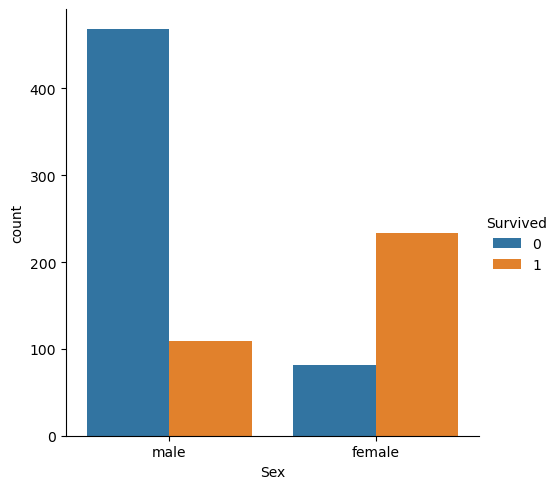

In [6]:
sns.catplot(x="Sex", hue="Survived", data=titanic, kind="count")

Visually wa can assume about 1 in 6 males survived and 5 of 7 females survived. We will break down by age and sex later. 

Text(0.5, 1.0, 'Survival vs Class Crosstab (Percentage of Class)')

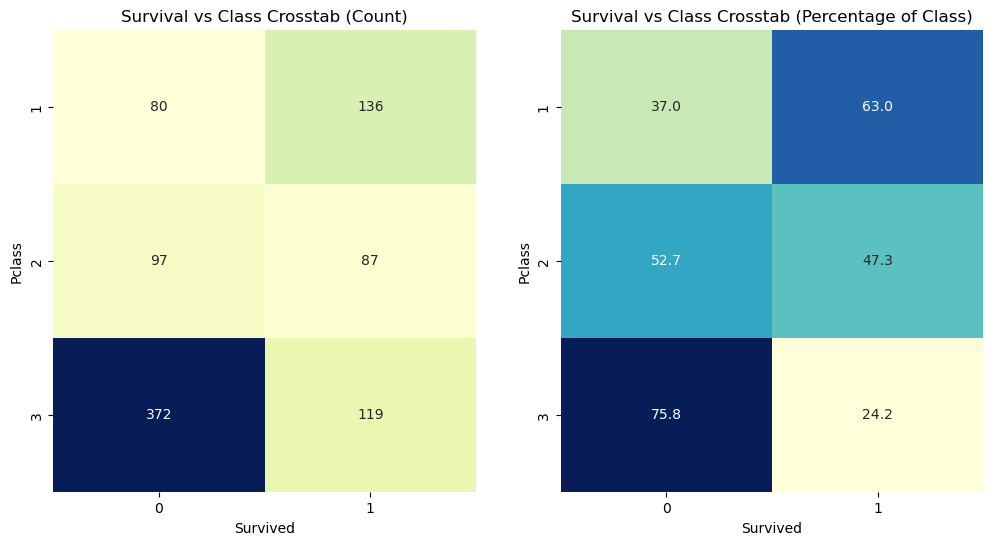

In [7]:
# Sort by passanger class and survival with a cross tabulation
pclass_survived = pd.crosstab(titanic['Pclass'], titanic['Survived'])
pclass_survived_percent = pclass_survived.div(pclass_survived.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1,2, figsize = (12,6))

sns.heatmap(pclass_survived, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0], cbar=False)
sns.heatmap(pclass_survived_percent, annot=True, fmt=".3", cmap="YlGnBu", ax=axes[1], cbar=False)

axes[0].set_title("Survival vs Class Crosstab (Count)")
axes[1].set_title("Survival vs Class Crosstab (Percentage of Class)")

Here we see that in absolute terms the most deaths were in third class, wehereas the best survivroship was in first class. 

In percentage terms third class had a mere ~24% survival rate, 2nd class had a ~47% survival rate and 1st class had a and far higher 63% survival rate. 

/tmp/ipykernel_116705/761224717.py:12: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.violinplot(y="Age", x="Sex", hue="Survived", data=titanic, split=True, palette=palette, ax=axes[1])
/tmp/ipykernel_116705/761224717.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.violinplot(y="Age", x="Pclass", hue="Survived", data=titanic, split=True, palette=palette, ax=axes[3])


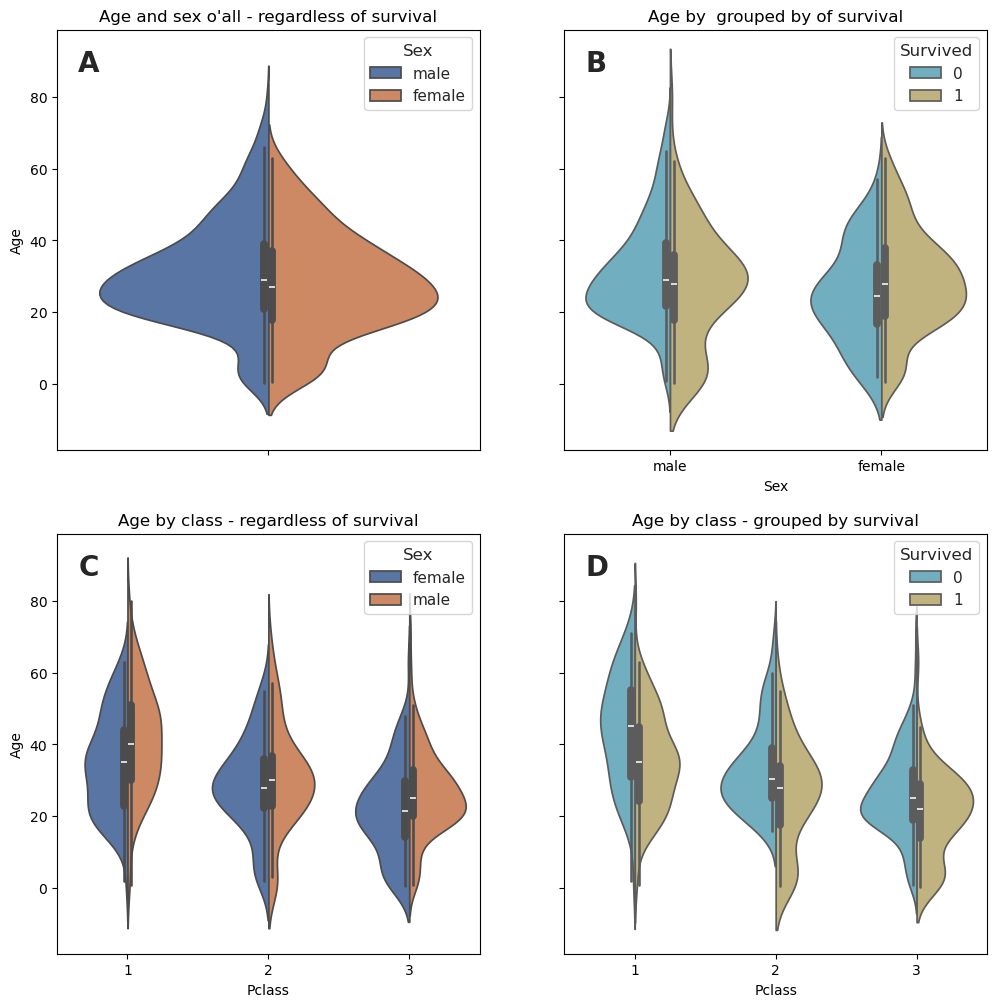

In [8]:
# Age, class, and survivorship
fig, axes = plt.subplots(2,2,figsize=(12,12), sharey=True)
axes=axes.flatten()   #single index indexing

#seaborn style and color palette stuff
sns.set(style="whitegrid")
palette = sns.color_palette()#"Blues_d",n_colors=15) # no arguments returns the default
palette.reverse()

# Plot w/ violin plots to look at distributions
sns.violinplot(y="Age", hue="Sex", data=titanic, split=True, ax=axes[0])
sns.violinplot(y="Age", x="Sex", hue="Survived", data=titanic, split=True, palette=palette, ax=axes[1])
sns.violinplot(y="Age", x="Pclass", hue="Sex", data=titanic, split=True, ax=axes[2])

sns.violinplot(y="Age", x="Pclass", hue="Survived", data=titanic, split=True, palette=palette, ax=axes[3])

# Annotations titles and the like
axes[0].set_title("Age and sex o'all - regardless of survival")
axes[1].set_title("Age by  grouped by of survival")
axes[2].set_title("Age by class - regardless of survival")
axes[3].set_title("Age by class - grouped by survival")

#add subplot letters

for n, ax in enumerate(axes):   
    ax.text(0.05, .9, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

There is a lot going on here, initial investigation of age, sex, passanger class, and survival:
<ol style="list-style-type: upper-alpha">
<li>Looking at the o'all demographics of all passngers regardless of survival: majority of passangers within the age range of 20-40 without a substantial deviation from a 50/50 gender split in that range. Children seem to have a bias towards more females, whereas the 60+ range has more males</li>
<li>When the overall age dmographics are broken down by class , we see a substanially more platykurtic distribution for first class, with females skewed younger than males. We also see this skew for third class - more younger females  </li>
<li>Looking at o'all survivorship by age and sex we can identify female surivorship os concentrated in the 20-40 year old range, beyond what the demographics in [A] may suggest. Male survivroship exhibits a bimodal distribution that is not nearly as pronounced in the overall demographiscs in [A] - male children and male adults (20-40) fair better than male teens.</li>
<li>Finally we break surviorship down by class. We see that in first class - our group which is the oldest overall - survivors tend to be a younger subset - so in the case of first class age seems to be a major factor. Second and third class - far more likely to be traveling with children sees the bimodal distrobution with children and  childrin</li>
</ol>

Hypothesis from observations: 
the bimodal distribuation of male survirorship needs to be invesagated further. initial hypothisis is children survived regardless of sex by essance of bing children (duh). A higher ratio of male surviroship may be present for those men traveling with families or spouses. We will have to look at survivorship ratios over age for single men, men traveling with children (as in their own or as siblings).

#### Survivorship by Traveling Companions

As we noted above, we need to investigate (male) surviorship over age categories by: 
1) If they were traveling alone or with others - further broken down by class
2) If they were traveling with a a spouse - further boken down by class
3) If they were traveling with siblings - further broken down by class

This means we will use the Age category to make a classification of each passenger, whereafter we plot traces/box plots for each classification and each class.

We may further investigate by number of traveling companions

In [9]:
# Determine if the passenger was alone or not (not traveling with family)
titanic["Alone"] = titanic[["SibSp","Parch"]].eq(0).any(axis=1)


#3-way cross tabulation to get surviorship by alone and class
pclass_alone_survived = pd.crosstab([titanic['Survived'], titanic['Alone']], titanic['Pclass'])
pclass_alone_survived_percent = pd.crosstab([titanic['Survived'], titanic['Alone']], titanic['Pclass'], normalize="columns")

# We need to check that our normalize was applied on the correct dim,
#    we want 100% accounted for across all 4 options for each class
pclass_alone_survived_percent.sum(axis=0)

Pclass
1    1.0
2    1.0
3    1.0
dtype: float64

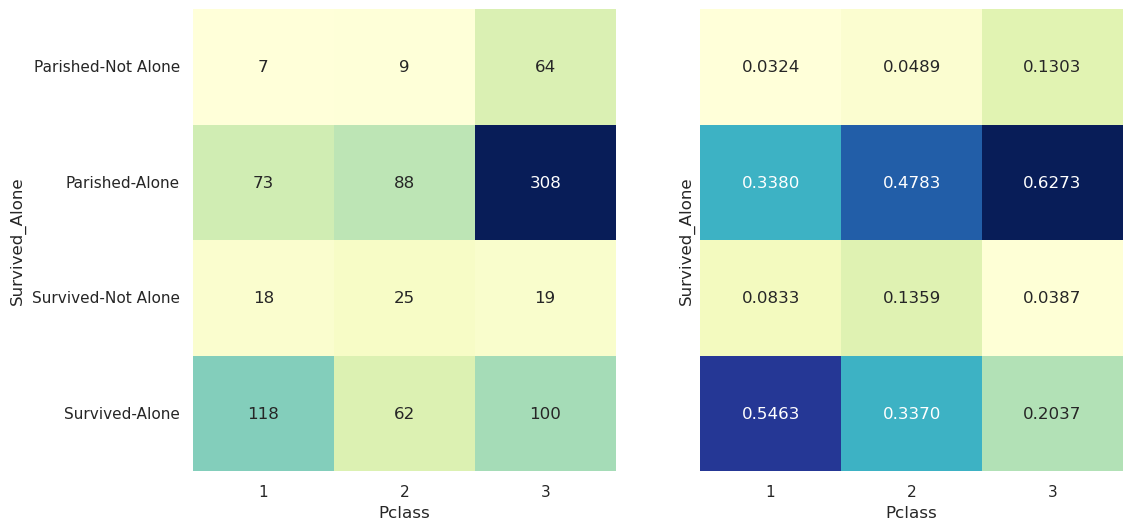

In [10]:
# Make a heatmap of survivorship percentage of the above
# Set up figure
fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True)

# Make a dict so we can map col names later
idx_key = {"True":"Alone", "False":"Not Alone", "0":"Parished", "1":"Survived"}

#seset indicies so they become columns we can manipulate
pclass_alone_survived_reset = pclass_alone_survived.reset_index()
pclass_alone_survived_percent_reset = pclass_alone_survived_percent.reset_index()

# Combine the multi-index levels into a single level and make readable
pclass_alone_survived_reset['Survived_Alone'] = pclass_alone_survived_reset['Survived'].astype(str).map(idx_key) + '-' + pclass_alone_survived_reset['Alone'].astype(str).map(idx_key)
pclass_alone_survived_percent_reset['Survived_Alone'] = pclass_alone_survived_percent_reset['Survived'].astype(str).map(idx_key) + '-' + pclass_alone_survived_percent_reset['Alone'].astype(str).map(idx_key)

# Drop the original multi-index columns
df_plot = pclass_alone_survived_reset.drop(columns=['Survived', 'Alone'])
df_plot_pct = pclass_alone_survived_percent_reset.drop(columns=['Survived', 'Alone'])

# Set the new single index
df_plot = df_plot.set_index('Survived_Alone')
df_plot_pct = df_plot_pct.set_index('Survived_Alone')

# Create the heatmap
sns.heatmap(df_plot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False, ax=axes[0])
sns.heatmap(df_plot_pct, annot=True, fmt=".4f", cmap="YlGnBu", cbar=False, ax=axes[1])

# Display the plot
plt.show()

From this alone we can see that traveling alone survival was poor for third class in particular (308 deaths or 63%) and not great for second class either (88 deaths or ~48%). Survival for those traveling alone was better for first class (118 survivals for a rate of ~55%). 


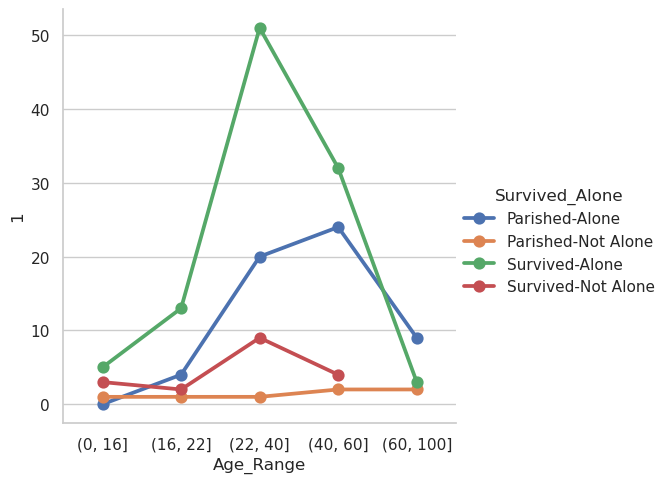

In [11]:
# Same cross tabulation as above, but we further break down by age category
#    The following are hand drawn deliniations to capture the bimodal distirbution we see,
#        we could use natural breaks or something if we wanted, quantiles, or fixed interval
#   [0-15, 16-22, 23-40, 41-60, 61-100]

#create a category that is an enum for alone survive (4 options)
# Calculate the alone survive counts and rates for each age cohort with a cross tab 

titanic["Age_Range"]=pd.cut(titanic["Age"],[0,16,22,40,60,100], right=True)
#titanic["Age_Range"]=pd.cut(titanic["Age"],np.append(np.arange(0,65,5),100), right=True)
age_alone_pclass_survived = pd.crosstab([titanic['Survived'], titanic['Alone'], titanic["Age_Range"]], titanic['Pclass'].astype(str))
age_alone_pclass_survived.reset_index(inplace=True)
age_alone_pclass_survived['Survived_Alone'] = (age_alone_pclass_survived['Survived'].astype(str).map(idx_key) + '-' + age_alone_pclass_survived['Alone'].astype(str).map(idx_key)).astype('category')
#age_alone_pclass_survived.rename(columns={1:"1st Class",2:"2nd Class",3:"3rd Class"})
df_plot = age_alone_pclass_survived.drop(columns=['Survived', 'Alone'])

sns.catplot(x="Age_Range",
            y="1",    # 1 = first class, 2=second, 3=third
            hue="Survived_Alone",
            data=df_plot,
            kind="bar",
           )
